In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

In [2]:
water_one = pd.read_csv('Water V 1.txt',sep = " ")
water_two = pd.read_csv('Water V 2.txt',sep = " ")
water_three = pd.read_csv('Water V 3.txt',sep = " ")
water_four = pd.read_csv('Water V 4.txt',sep=" ")
die_water = pd.read_csv('Die Water V 1.txt',sep=" ")
paper_water_one = pd.read_csv('Water V Paper 1.txt',sep=" ")
paper_water_two = pd.read_csv('Water Paper V 2.txt',sep=" ")
syrup_125_1 = pd.read_csv('12.5 V 1.txt',sep=" ")
syrup_125_2 = pd.read_csv('12.5 V 2.txt',sep=" ")
syrup_125_3 = pd.read_csv('12.5 V 3.txt',sep=" ")
syrup_25_1 = pd.read_csv('25 V 1.txt',sep=" ")
syrup_25_2 = pd.read_csv('25 V 2.txt',sep=" ")
syrup_25_3 = pd.read_csv('25 V 3.txt',sep=" ")
syrup_50_1 = pd.read_csv('50 V 1.txt',sep=" ")
syrup_50_2 = pd.read_csv('50 V 2.txt',sep=" ")
syrup_50_3 = pd.read_csv('50 V 3.txt',sep=" ")

In [3]:
#Here is all of the tube test data

time_water = pd.DataFrame([0.366,0.381,0.368,0.367,0.380])
time_125 = pd.DataFrame([0.396,0.396,0.397,0.397,0.381])
time_25 = pd.DataFrame([0.426,0.442,0.456,0.442,0.458])
time_50 = pd.DataFrame([0.655,0.671,0.654,0.668,0.656])
time_375 = pd.DataFrame([0.518,0.533,0.518])
full_tube_V = 0.014 #14 mL without ball
angle = 60 #60 degree angle
mass_ball = 0.0083645 #mass of ball in kg
dens_ball = 7890 #kg/m^3 density of ball 7890
length_tube = 0.04 #length of tube is 0.04 m
dens_corn_syrup = 1400 #kg/m^3
dens_water = 1000 #kg/^3
dens_125 = (1400*0.125) + (1000*0.875)
dens_25 = (1400*0.25) + (1000*0.75)
dens_50 = (1400*0.5) + (1000*0.5)
dens_375 = (1400*0.375) + (1000*0.625)
r_ball = 0.006325 #radius in m
d_ball = r_ball *2
d_tube = d_ball + 0.001 #this is gotten from the K factor being 10^-5

In [68]:
def velocity(lst,empt_lst):
    for i in lst[0]:
        v = length_tube/i
        empt_lst.append(v)
    return empt_lst

def viscosity(lst,empt_lst,dens):
    K = 1.4202*10**-5#10**-3
    lst_df = pd.DataFrame(lst)
    for i in lst_df[0]:
        #visc = (2*(dens_ball - dens)*9.81*(r_ball**2)) / (i *9)
        #visc = ((r_ball*2)**2 * (dens_ball - dens)*(np.sin(np.deg2rad(60))*9.81)*(1/i))/18
        visc = (np.pi*(5/42))*K*((((r_ball*2)**2)*dens*9.81*np.sin(np.deg2rad(60)))/i)*((dens_ball-dens)/dens)*((d_ball+d_tube)/d_ball)
        empt_lst.append(visc)
    return empt_lst

#eq 13 used above

def reynolds(vel,vis,empt_lst,dens,empt_lst_2):
    #now for resistance factor
    R = (5/7)*9.81*np.sin(np.deg2rad(60))*((np.pi*d_ball**3)/6)*(dens_ball-dens) #eq 8
    for i in range(len(vel)):
        reyn = (vel[i]*dens*(d_tube-d_ball))/vis[i]
        #table 2 eq
        f = R/(((d_tube-d_ball)**2)*dens_ball*(vel[i]**2))
        empt_lst.append(reyn)
        empt_lst_2.append(f)
        
def froude_each(vel,empt_lst):
    for i in range(len(vel)):
        froude = vel[i]/(9.81*d_tube-d_ball)
        empt_lst.append(froude)
        
        
    
vel_water = []
vel_125 = []
vel_25 = []
vel_50 = []
vel_375 = []

vis_water = []
vis_125 = []
vis_25 = []
vis_50 = []
vis_375 = []

rey_water = []
rey_125 = []
rey_25 = []
rey_50 = []
rey_375 = []

res_fac_w = []
res_fac_125 = []
res_fac_25 = []
res_fac_50 = []
res_fac_375 = []

fr_w = []
fr_125 = []
fr_25 = []
fr_50 = []
fr_375 = []

vel_water = velocity(time_water,vel_water)
vel_125 = velocity(time_125,vel_125)
vel_25 = velocity(time_25,vel_25)
vel_50 = velocity(time_50,vel_50)
vel_375 = velocity(time_375,vel_375)

visc_water = viscosity(vel_water,vis_water,dens_water)
visc_125 = viscosity(vel_125,vis_125,dens_125)
visc_25 = viscosity(vel_25,vis_25,dens_25)
visc_50 = viscosity(vel_50,vis_50,dens_50)
visc_375 = viscosity(vel_375,vis_375,dens_375)

re_water = reynolds(vel_water,vis_water,rey_water,dens_water,res_fac_w)
re_125 = reynolds(vel_125,vis_125,rey_125,dens_125,res_fac_125)
re_25 = reynolds(vel_125,vis_125,rey_125,dens_125,res_fac_25)
re_50 = reynolds(vel_50,vis_50,rey_50,dens_50,res_fac_50)
re_375 = reynolds(vel_375,vis_375,rey_375,dens_375,res_fac_375)

fro_w = froude_each(vel_water,fr_w)
fro_125 = froude_each(vel_125,fr_125)
fro_25 = froude_each(vel_25,fr_25)
fro_50 = froude_each(vel_50,fr_50)
fro_375 = froude_each(vel_375,fr_375)





In [69]:
vel_all = vel_water + vel_125 + vel_25 + vel_375 + vel_50 
re_all = rey_water + rey_125 + rey_25 + rey_375 + rey_50 
vis_all = vis_water + vis_125 + vis_25 + vis_375 + vis_50 
res_fac_all = res_fac_w + res_fac_125 + res_fac_25 +res_fac_375 + res_fac_50 
fr_all = fr_w + fr_125 + fr_25 + fr_375 + fr_50 

In [70]:
#now make a dataframe with all of these values
data = pd.DataFrame({
    'velocity (m/s)':vel_all,
    'viscosity (N*s/m^2)':vis_all,
    'resistance factor':res_fac_all,
    'reynolds number':re_all,
    'froudes number':fr_all
})
data

,velocity (m/s),viscosity (N*s/m^2),resistance factor,reynolds number,froudes number
0,0.109290,0.000946,470.247190,115.470908,0.901309
1,0.104987,0.000985,509.581895,106.557691,0.865825
2,0.108696,0.000952,475.400545,114.219200,0.896411
3,0.108992,0.000949,472.820357,114.842496,0.898853
4,0.105263,0.000983,506.910435,107.119259,0.868103
5,0.101010,0.001017,546.501414,104.327019,0.833028
6,0.101010,0.001017,546.501414,104.327019,0.833028
7,0.100756,0.001019,549.265007,103.802104,0.830930
8,0.100756,0.001019,549.265007,103.802104,0.830930
9,0.104987,0.000978,505.883913,112.703453,0.865825


## Reynolds vs Driving Force

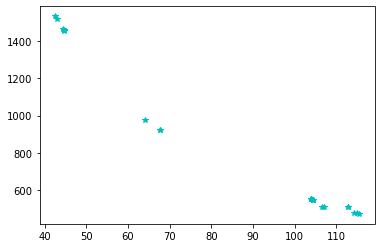

In [58]:
plt.plot(re_all,res_fac_all,'c*')
#plt.plot(re_all,vis_all,'c*')

The plot above looks alot like Figure 2 within the 1942 paper

In [8]:
#finding K using linear regression least squares
#from water viscosity know as 1*10**-3 N*s/m^2 

def func(vel_water,K):
    visc = (np.pi*(5/42))*K*((((r_ball*2)**2)*dens_water*9.81*np.sin(np.deg2rad(60)))/vel_water)*((dens_ball-dens_water)/dens_water)*((d_ball+d_tube)/d_ball)
    return visc

visc = [1*10**-3,1*10**-3,1*10**-3,1*10**-3,1*10**-3]
initial_guess = [0.00004]
pars, pcov = curve_fit(func,vel_water,visc,p0=initial_guess)
pars

array([1.47426677e-05])

            2
-2.489e+06 x - 9.454e+04 x + 206.5


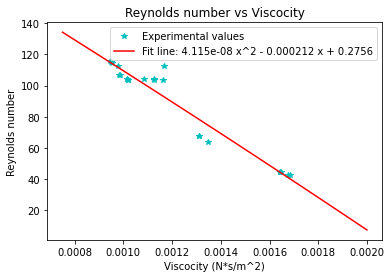

In [53]:
b, pcov = np.polyfit(vis_all, re_all, 2, cov=True)
p = np.poly1d(b)
xs = np.linspace(0.00075, 0.002, 100)
ys = p(xs)

plt.plot(vis_all,re_all,'c*',label='Experimental values')
plt.plot(xs,ys,'r-',label='Fit line: 4.115e-08 x^2 - 0.000212 x + 0.2756')
plt.xlabel('Viscocity (N*s/m^2)')
plt.ylabel('Reynolds number')
plt.title('Reynolds number vs Viscocity')
plt.legend(loc='upper right')
print(p)

In [9]:
print(vis_water)

[0.0009464688475537894, 0.000985258554420748, 0.0009516408084693838, 0.0009490548280115868, 0.000982672573962951]


In [10]:
print(vis_25)

[0.0010856388843827032, 0.0011264140537491898, 0.0011620923269448657, 0.0011264140537491898, 0.0011671892231156762]


In [11]:
print(vis_50)

[0.0016446497920238915, 0.0016848244434321087, 0.0016421388763108778, 0.0016772916962930681, 0.0016471607077369048]


## Froude Plotting

In [54]:
#this is for average froude
def Froude(vel):
    s = sum(vel)/len(vel)
    fr = s/(9.81*r_ball*2)**(1/2)
    return fr, s

fr_125 = Froude(vel_125)
fr_25 = Froude(vel_25)
fr_50 = Froude(vel_50)

#### Froude Graph

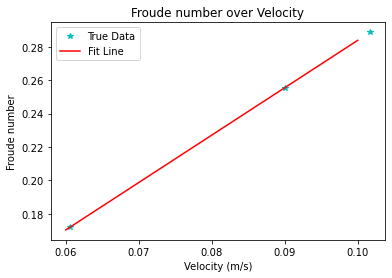

In [55]:
vel = [fr_125[1],fr_25[1],fr_50[1]]
froude = [fr_125[0],fr_25[0],fr_50[0]]
b, pcov = np.polyfit(vel, froude, 1, cov=True)
p = np.poly1d(b)
# create plot
xs = np.linspace(0.06, 0.1, 10)
ys = p(xs)
plt.plot(vel,froude,'c*',label='True Data')
plt.plot(xs,ys,'r-',label='Fit Line')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Froude number')
plt.title('Froude number over Velocity')
plt.legend()

## Froude vs Reynolds

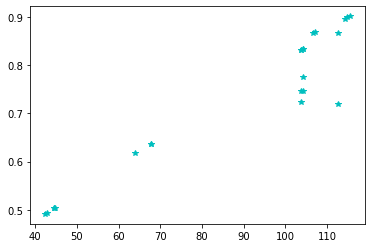

In [61]:
plt.plot(re_all,fr_all,'c*')

In [62]:
fr_all

[0.9013093523756567,
 0.8658247322033866,
 0.8964109319823107,
 0.8988534685817176,
 0.868103218340764,
 0.8330283408320462,
 0.8330283408320462,
 0.8309300326687413,
 0.8309300326687413,
 0.8658247322033866,
 0.7743643731678177,
 0.7463330836413808,
 0.7234193486173033,
 0.7463330836413808,
 0.7202603121604592,
 0.5036324014801379,
 0.4916232831139945,
 0.5044024816047252,
 0.4938311721100155,
 0.5028646691608084,
 0.6368324767750778,
 0.6189103620440718,
 0.6368324767750778]

# Cleans all the data so it can be used in calculations

In [20]:
class clean:
    R = 0.05 #3 cm radius of cylinder
    a = 0.001 #1 mm radius hole on bottom
    #the above cannot be referenced in the child function for some
    #strange reason

    def __init__(self,df,columns): 
    
        self.df = df
        self.columns = columns #should be df.columns[2]
        self.time = []
        self.height = []
        self.time_predic = []
        self.height_predic = []
        self.velocity = []
        self.velocity1 = []
        self.time1= []
    
    def clean(self):
        for i in self.df.index:
            if (i%2 == 0):
                self.time.append(self.df[self.columns][i]/1000) #get to seconds 
            if (i%2 == 1):
                #scale linearly with y-intercept = 205, x = 155/175
                reverse = (self.df[self.columns][i] - 205) * (155/175) 
                #155 = max height, must reverse height data so that it goes down instead of up witht ime
                correct = 155 - reverse
                self.height.append(correct)
        return(self.time, self.height)
    #the below function is not correct, do not use it
    def tor_velc(self,R,r):
        a = 0
        for i in range(len(self.height)):
            if (a == 0):
                a += 1
            if (a > 0 and a < 360):
                a += 1
                q = (self.height[i-1]/1000-self.height[i]/1000)*(np.pi * R**2)/(self.time[i]-self.time[i-1])
                v = q / (np.pi*r**2)
                t = self.time[i]
            if (a > 360):
                break
            if (v>0):
                self.velocity1.append(v)
                self.time1.append(t)
        return(np.array(self.velocity1),np.array(self.time1))
    
    #uses the toricelli equation to find the time given the height
    def toricelli_height(self,R,a,dens):
        for i in self.height:
            t = (R**2 / a**2) * ((2*(i/1000))/9.81)**(1/2)
            v = (2*9.81*(i/1000)*(dens/1000))**(1/2)
            self.time_predic.append(t)
            self.velocity.append(v)
        return(np.array(self.time_predic),np.array(self.velocity))
    #uses the toricelli equation to find the height given the time
    def toricelli_time(self,R,a):
        for i in self.time:
            h = (i * (a**2)/(R**2))**2 * (9.81/2) 
            h_1 = h * 1000
            self.height_predic.append(h_1)
        return(np.array(self.height_predic))
    #finds the velocity of the fluid leaving the toricelli tube
    def velocity(self,R,a):
        for i in range(len(self.height)):
            v = (2*9.81*self.height[i])**(1/2)
            self.velocity.append(v)
        return(np.array(self.velocity))

water_1 = clean(water_one,water_one.columns[2]) #'208'
water_2 = clean(water_two,water_two.columns[2])
water_3 = clean(water_three,water_three.columns[2])
water_4 = clean(water_four,water_four.columns[2])
die_water_1 = clean(die_water,die_water.columns[2])
paper_water_1 = clean(paper_water_one,paper_water_one.columns[2])
paper_water_2 = clean(paper_water_two,paper_water_two.columns[2])
data_125_1 = clean(syrup_125_1,syrup_125_1.columns[2])
data_125_2 = clean(syrup_125_2,syrup_125_2.columns[2])
data_125_3 = clean(syrup_125_3,syrup_125_3.columns[2])
data_25_1 = clean(syrup_25_1,syrup_25_1.columns[2])
data_25_2 = clean(syrup_25_2,syrup_25_2.columns[2])
data_25_3 = clean(syrup_25_3,syrup_25_3.columns[2])
data_50_1 = clean(syrup_50_1,syrup_50_1.columns[2])
data_50_2 = clean(syrup_50_2,syrup_50_2.columns[2])
data_50_3 = clean(syrup_50_3,syrup_50_3.columns[2])

water_2.clean()
water_1.clean()
water_3.clean()
water_4.clean()
die_water_1.clean()
paper_water_1.clean()
paper_water_2.clean()
data_125_1.clean()
data_125_2.clean()
data_125_3.clean()
data_25_1.clean()
data_25_2.clean()
data_25_3.clean()
data_50_1.clean()
data_50_2.clean()
data_50_3.clean()

R = 0.025
a = 0.001

water_2_height_prediction = water_2.toricelli_height(R,a,dens_125)
water_1_height_prediction = water_1.toricelli_height(R,a,dens_125)
water_3_height_prediction = water_3.toricelli_height(R,a,dens_125)
water_4_height_prediction = water_4.toricelli_height(R,a,dens_125)
die_water_1_height_prediction = die_water_1.toricelli_height(R,a,dens_125)
paper_water_1_height_prediction = paper_water_1.toricelli_height(R,a,dens_125)
paper_water_2_height_predition = paper_water_2.toricelli_height(R,a,dens_125)
data_125_1_h_p = data_125_1.toricelli_height(R,a,dens_125)
data_25_1_h_p = data_25_1.toricelli_height(R,a,dens_25)
data_50_1_h_p = data_50_1.toricelli_height(R,a,dens_50)


water_2_time_prediction = water_2.toricelli_time(R,a)
water_1_time_prediction = water_1.toricelli_time(R,a)
water_3_time_prediction = water_3.toricelli_time(R,a)
water_4_time_prediction = water_4.toricelli_time(R,a)
die_water_1_time_prediction = die_water_1.toricelli_time(R,a)
paper_water_1_time_prediction = paper_water_1.toricelli_time(R,a)
paper_water_2_time_prediction = paper_water_2.toricelli_time(R,a)
data_125_1_t_p = data_125_1.toricelli_time(R,a)
data_25_1_t_p = data_25_1.toricelli_time(R,a)
data_50_1_t_p = data_50_1.toricelli_time(R,a)

data_50_v = data_50_1.tor_velc(R,a)
data_25_v = data_25_3.tor_velc(R,a)
data_125_v = data_125_1.tor_velc(R,a)

#water_2_velocity = water_2.velocity(R,a)
#water_1_velocity = water_1.velocity(R,a)
#print(data_125_1_h_p[1])

<ipython-input-20-b0b64a6ad4c5>:51: RuntimeWarning: invalid value encountered in double_scalars
  t = (R**2 / a**2) * ((2*(i/1000))/9.81)**(1/2)
<ipython-input-20-b0b64a6ad4c5>:52: RuntimeWarning: invalid value encountered in double_scalars
  v = (2*9.81*(i/1000)*(dens/1000))**(1/2)


[-0.03889437  6.88387379]


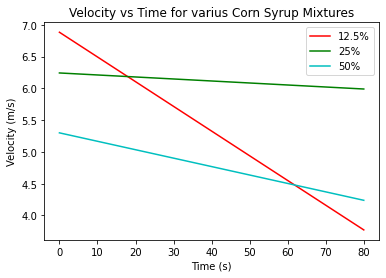

In [57]:
data_125_vel = data_125_v[0]
data_125_ti = data_125_v[1]
data_25_vel = data_25_v[0]
data_25_ti = data_25_v[1]
data_50_vel = data_50_v[0]
data_50_ti = data_50_v[1]

b1, pcov1 = np.polyfit(data_125_ti, data_125_vel, 1, cov=True)
p1 = np.poly1d(b1)
xs1 = np.linspace(0, 80, 20)
ys1 = p1(xs1)

b2, pcov2 = np.polyfit(data_25_ti, data_25_vel, 1, cov=True)
p2 = np.poly1d(b2)
xs2 = np.linspace(0, 80, 20)
ys2 = p2(xs2)

b3, pcov = np.polyfit(data_50_ti, data_50_vel, 1, cov=True)
p3 = np.poly1d(b3)
xs3 = np.linspace(0, 80, 20)
ys3 = p3(xs3)

plt.plot(xs1,ys1,'r',label='12.5%')
plt.plot(xs2,ys2,'g',label='25%')
plt.plot(xs3,ys3,'c',label='50%')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs Time for varius Corn Syrup Mixtures')
plt.legend(loc='upper right')

print(b1)

#### Time vs Velocity

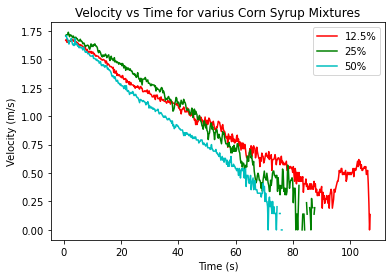

In [24]:
plt.plot(data_125_1.time[:-1],data_125_1_h_p[1],'r',label='12.5%')
plt.plot(data_25_1.time[:-1],data_25_1_h_p[1],'g',label='25%')
plt.plot(data_50_1.time[:-1],data_50_1_h_p[1],'c',label='50%')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs Time for varius Corn Syrup Mixtures')
plt.legend(loc='upper right')

#### Height vs velocity

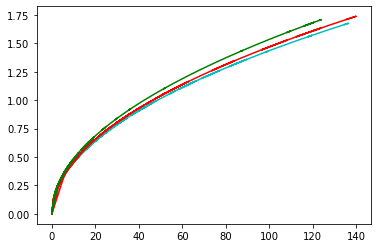

In [25]:
plt.plot(data_125_1.height,data_125_1_h_p[1],'c-')
plt.plot(data_25_1.height,data_25_1_h_p[1],'r-')
plt.plot(data_50_1.height,data_50_1_h_p[1],'g-')

#### 12.5% Graphs

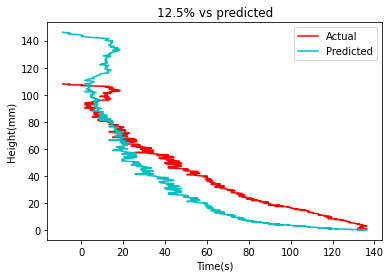

In [26]:
plt.plot(data_125_1.height,data_125_1.time[:-1],'r-',label='Actual')
plt.xlabel('Time(s)')
plt.ylabel('Height(mm)')
plt.plot(data_125_1.height,data_125_1_t_p[:-1],'c-',label='Predicted')
plt.title('12.5% vs predicted')
plt.legend()